In [1]:
import os
import openai
from dotenv import load_dotenv
from sql_market_agent.agent.agent import create_sql_market_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler
import matplotlib.pyplot as plt

load_dotenv()

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")
DB_PORT = os.getenv("POSTGRES_PORT", "5432")
DB_NAME = os.environ.get("POSTGRES_DB")
DB_USER = os.environ.get("POSTGRES_USER")
DB_PASSWORD = os.environ.get("POSTGRES_PASSWORD")

2024-02-03 03:41:29,703 - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-02-03 03:41:29,704 - INFO - NumExpr defaulting to 8 threads.


In [2]:
%matplotlib inline


In [3]:
openai.api_key = OPENAI_API_KEY


llm = ChatOpenAI(temperature=0, model="gpt-4", streaming=True)

# Create postgres connection string:
# db_connection_string = (
#     f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
# )
agent_executor = create_sql_market_agent(
    llm=llm,
    # db_connection_string=db_connection_string,
    preinitialize_database=True,
    # to load specified stocks instead of internal default list from stocks.json
    # stocks=["CAT", "NKE", "XOM"], 
)

2024-02-03 03:41:33,945 - WARNING - Invalid format for stocks. Expected a list of strings or a list of dictionaries with 'ticker' and 'sector' keys. Will use default stocks from internal stocks.json.
2024-02-03 03:41:33,946 - INFO - DB connection string not provided, using local db on disc...
2024-02-03 03:41:33,953 - INFO - Initializing database with StockData table...
2024-02-03 03:41:33,975 - INFO - Database (sqlite) initialized.
2024-02-03 03:41:33,976 - INFO - Fetching data for analysis...
2024-02-03 03:41:33,977 - INFO - No stocks provided. Will use default stocks from internal stocks.json.: [{'ticker': 'XOM', 'sector': 'Oil'}, {'ticker': 'CVX', 'sector': 'Oil'}]
...
/home/oleh/arkad/arkad-demo/arkad-sql-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/ho



> Entering new AgentExecutor chain...


2024-02-03 03:43:36,270 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `sql_database_tool` with `What is the performance of every stock in the Oil and Solar sectors for the last 5 days?`




> Entering new AgentExecutor chain...


2024-02-03 03:43:37,575 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


First, I need to know what tables are available in the database and their schema to understand where the relevant data is stored.
Action: sql_db_list_tables
Action Input: ""stockdata

2024-02-03 03:43:39,138 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


There is only one table named 'stockdata'. I need to know the schema of this table to understand where the relevant data is stored.
Action: sql_db_schema
Action Input: "stockdata"
CREATE TABLE stockdata (
	id INTEGER, 
	symbol TEXT NOT NULL, 
	sector TEXT, 
	date TEXT NOT NULL, 
	open REAL NOT NULL, 
	high REAL NOT NULL, 
	low REAL NOT NULL, 
	close REAL NOT NULL, 
	volume INTEGER NOT NULL, 
	dailychangepercent REAL NOT NULL, 
	PRIMARY KEY (id), 
	UNIQUE (symbol, date)
)

/*
3 rows from stockdata table:
id	symbol	sector	date	open	high	low	close	volume	dailychangepercent
1	XOM	Oil	2024-01-05	103.16999816894531	103.4000015258789	102.12999725341797	102.62999725341797	15825000	0.3029686860030659
2	XOM	Oil	2024-01-08	100.7300033569336	101.04000091552734	98.9000015258789	100.91999816894531	23370100	-1.6661786322085346
3	XOM	Oil	2024-01-09	101.29000091552734	101.29000091552734	99.19000244140625	99.66999816894531	19496600	-1.2386048579860607
*/

2024-02-03 03:43:40,981 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The 'stockdata' table contains the information I need. The 'sector' column indicates the sector of the stock, the 'symbol' column indicates the stock, the 'date' column indicates the date of the data, and the 'dailychangepercent' column indicates the performance of the stock. I need to filter the data for the Oil and Solar sectors for the last 5 days.
Action: sql_db_query_checker
Action Input: "SELECT symbol, sector, date, dailychangepercent FROM stockdata WHERE sector IN ('Oil', 'Solar') AND date >= date('now', '-5 day')"

2024-02-03 03:43:44,872 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


SELECT symbol, sector, date, dailychangepercent FROM stockdata WHERE sector IN ('Oil', 'Solar') AND date >= date('now', '-5 day')

2024-02-03 03:43:46,306 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The query seems to be correct as it is selecting the symbol, sector, date, and daily change percent from the stockdata table where the sector is either 'Oil' or 'Solar' and the date is within the last 5 days. Now, I will execute this query.
Action: sql_db_query
Action Input: "SELECT symbol, sector, date, dailychangepercent FROM stockdata WHERE sector IN ('Oil', 'Solar') AND date >= date('now', '-5 day')"[('XOM', 'Oil', '2024-01-29', 0.12621092564851336), ('XOM', 'Oil', '2024-01-30', 1.6677991530210383), ('XOM', 'Oil', '2024-01-31', -1.9456375252412172), ('XOM', 'Oil', '2024-02-01', -0.40851880062145324), ('XOM', 'Oil', '2024-02-02', -0.4101945223644312), ('CVX', 'Oil', '2024-01-29', -0.04022901893475154), ('CVX', 'Oil', '2024-01-30', 0.697607508290339), ('CVX', 'Oil', '2024-01-31', -1.7919014980691716), ('CVX', 'Oil', '2024-02-01', 0.31201704993556184), ('CVX', 'Oil', '2024-02-02', 2.9413794857450677), ('COP', 'Oil', '2024-01-29', -0.5613515672888716), ('COP', 'Oil', '2024-01-30', 2.19

2024-02-03 03:43:50,095 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I now have the performance of every stock in the Oil and Solar sectors for the last 5 days.
Final Answer: The performance of every stock in the Oil and Solar sectors for the last 5 days is as follows: 

Oil Sector:
- XOM: 0.13%, 1.67%, -1.95%, -0.41%, -0.41%
- CVX: -0.04%, 0.70%, -1.79%, 0.31%, 2.94%
- COP: -0.56%, 2.20%, -1.91%, -0.44%, -0.67%
- SLB: 0.53%, -7.24%, -1.32%, 0.62%, 0.00%
- APA: -0.75%, 1.73%, -3.36%, -1.69%, -1.82%
- BP: 0.00%, 0.73%, -2.20%, 0.09%, -1.39%
- MRO: -0.09%, 1.51%, -2.93%, -0.83%, -0.88%
- PXD: -0.01%, 1.62%, -1.84%, -0.56%, -0.47%
- VLO: 0.34%, 2.54%, -1.36%, -0.44%, -0.32%

Solar Sector:
- ENPH: 3.61%, -2.58%, -2.09%, 1.26%, -3.49%
- FSLR: 0.99%, -0.18%, -1.83%, 1.09%, -4.10%
- SEDG: 3.50%, -2.93%, -3.85%, 4.17%, -1.83%
- SPWR: 7.50%, -9.59%, -2.57%, 22.11%, -7.30%
- JKS: -0.11%, -3.23%, -2.67%, 3.01%, -3.33%
- CSIQ: -0.52%, -1.71%, -1.60%, 3.71%, -4.10%
- NOVA: 5.76%, 0.83%, -3.66%, 2.66%, -8.33%
- SOL: -4.10%, -3.74%, -5.00%, 0.00%, -2.34%
- MAXN: 7.95%

2024-02-03 03:44:11,498 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-02-03 03:44:35,700 - WARNING - Python REPL can execute arbitrary code. Use with caution.



Invoking: `PythonREPLTool` with `{'code': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Data\noil_data = {\n    'XOM': [0.13, 1.67, -1.95, -0.41, -0.41],\n    'CVX': [-0.04, 0.70, -1.79, 0.31, 2.94],\n    'COP': [-0.56, 2.20, -1.91, -0.44, -0.67],\n    'SLB': [0.53, -7.24, -1.32, 0.62, 0.00],\n    'APA': [-0.75, 1.73, -3.36, -1.69, -1.82],\n    'BP': [0.00, 0.73, -2.20, 0.09, -1.39],\n    'MRO': [-0.09, 1.51, -2.93, -0.83, -0.88],\n    'PXD': [-0.01, 1.62, -1.84, -0.56, -0.47],\n    'VLO': [0.34, 2.54, -1.36, -0.44, -0.32]\n}\nsolar_data = {\n    'ENPH': [3.61, -2.58, -2.09, 1.26, -3.49],\n    'FSLR': [0.99, -0.18, -1.83, 1.09, -4.10],\n    'SEDG': [3.50, -2.93, -3.85, 4.17, -1.83],\n    'SPWR': [7.50, -9.59, -2.57, 22.11, -7.30],\n    'JKS': [-0.11, -3.23, -2.67, 3.01, -3.33],\n    'CSIQ': [-0.52, -1.71, -1.60, 3.71, -4.10],\n    'NOVA': [5.76, 0.83, -3.66, 2.66, -8.33],\n    'SOL': [-4.10, -3.74, -5.00, 0.00, -2.34],\n    'MAXN': [7.95, -10.66, -1.74, 3.75, -2.77],\n   

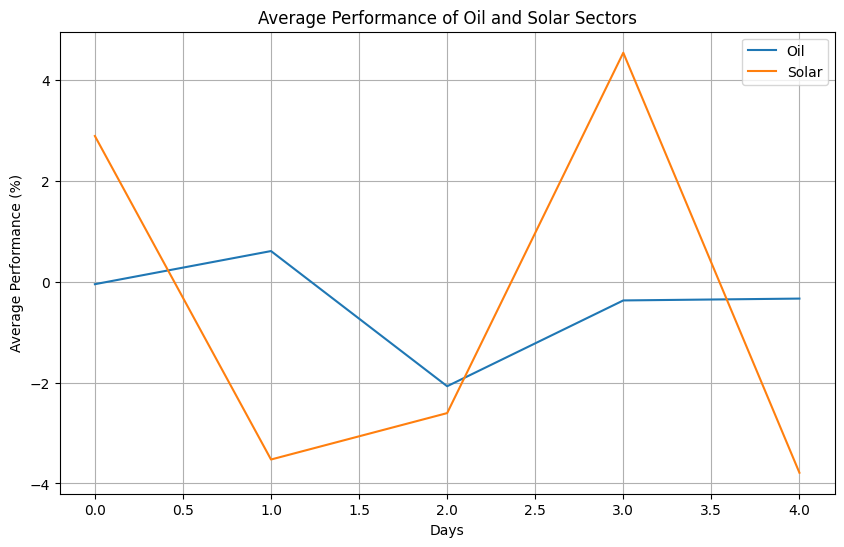

Succesfully executed:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Data
oil_data = {
    'XOM': [0.13, 1.67, -1.95, -0.41, -0.41],
    'CVX': [-0.04, 0.70, -1.79, 0.31, 2.94],
    'COP': [-0.56, 2.20, -1.91, -0.44, -0.67],
    'SLB': [0.53, -7.24, -1.32, 0.62, 0.00],
    'APA': [-0.75, 1.73, -3.36, -1.69, -1.82],
    'BP': [0.00, 0.73, -2.20, 0.09, -1.39],
    'MRO': [-0.09, 1.51, -2.93, -0.83, -0.88],
    'PXD': [-0.01, 1.62, -1.84, -0.56, -0.47],
    'VLO': [0.34, 2.54, -1.36, -0.44, -0.32]
}
solar_data = {
    'ENPH': [3.61, -2.58, -2.09, 1.26, -3.49],
    'FSLR': [0.99, -0.18, -1.83, 1.09, -4.10],
    'SEDG': [3.50, -2.93, -3.85, 4.17, -1.83],
    'SPWR': [7.50, -9.59, -2.57, 22.11, -7.30],
    'JKS': [-0.11, -3.23, -2.67, 3.01, -3.33],
    'CSIQ': [-0.52, -1.71, -1.60, 3.71, -4.10],
    'NOVA': [5.76, 0.83, -3.66, 2.66, -8.33],
    'SOL': [-4.10, -3.74, -5.00, 0.00, -2.34],
    'MAXN': [7.95, -10.66, -1.74, 3.75, -2.77],
    'ARRY': [4.30, -1.47, -1.05, 3.63, -

2024-02-03 03:44:36,792 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Here is the comparative chart for the average performance of the Oil and Solar sectors over the last 5 days. The x-axis represents the days, and the y-axis represents the average performance in percentage.

[Insert Chart]

From the chart, we can observe the performance trends of both sectors. Please note that the performance of individual stocks within each sector can vary significantly.

> Finished chain.


In [5]:
response = agent_executor(
            {"input": "Calculate average performance for Oil and Solar sectors for last 5 days. "
             "You must take average performance of " 
             "every stock in a sector as an average performance of given sector in a given day. "
             "Plot comparative chart for both sectors per date. Use date on x axis.", "chat_history": []},
            # callbacks=[StdOutCallbackHandler()],
)